# Web Scraping


In [1]:
from bs4 import BeautifulSoup
from IPython.display import Image
import requests 
import csv

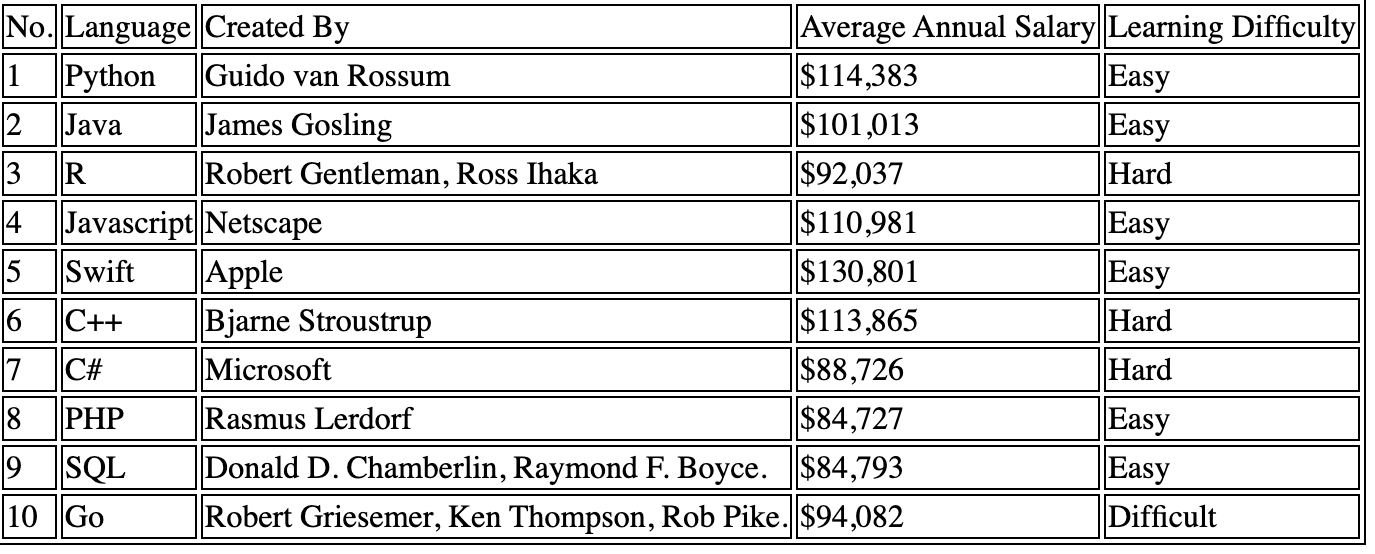

In [2]:
#url containing the data to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
Image(filename='table.png',width=800, height=600)

In [3]:
response = requests.get(url)  
if response.status_code == 200:  
    soup = BeautifulSoup(response.text, "html5lib")  
    print("Webpage downloaded successfully:", response.status_code)
else:
    print("Failed to download the webpage:", response.status_code)

Webpage downloaded successfully: 200


Scraping the `Language name` and `annual average salary`.


In [5]:
scraped_data = []
table = soup.find('table')
for row in table.find_all('tr'): 
    lan = row.find_all('td') 
    lan_name = lan[1].getText() 
    aas = lan[3].getText() 
    print("{}: {}".format(lan_name, aas))
    scraped_data.append({"Language": lan_name, "Average Annual Salary": aas})

Language: Average Annual Salary
Python: $114,383
Java: $101,013
R: $92,037
Javascript: $110,981
Swift: $130,801
C++: $113,865
C#: $88,726
PHP: $84,727
SQL: $84,793
Go: $94,082


In [9]:
filename = "popular-languages.csv"
with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ["Language", "Average Annual Salary"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writerows(scraped_data)
print(f"Scraped data successfully saved to {filename}")

Scraped data successfully saved to popular-languages.csv
